# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [199]:
# Import essential libraries for data manipulation and analysis

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("sklearn version:", sklearn.__version__)

numpy version: 2.2.2
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2
sklearn version: 1.6.1


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [202]:
# Importing the file porter_data_1.csv
file_path = r"C:\Users\aa_la\Downloads\30688323-a1ea-4809-83c4-91d8096236c8-Delivery-Starter\Delivery_Starter"
df = pd.read_csv(file_path + r"\porter_data_1.csv")
df.info(show_counts=True)
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [207]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [210]:
numeric_df = df.select_dtypes(include=['int64','float64','int32'])
neg_counts = (numeric_df < 0).sum()


neg_columns = neg_counts[neg_counts > 0]
print(neg_columns)
for col in ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']:
    if (df[col] < 0).any():
        df[col] = df[col].apply(lambda x: max(x, 0))
df.isnull().mean()

min_item_price              12
total_onshift_dashers       21
total_busy_dashers          21
total_outstanding_orders    41
dtype: int64


market_id                   0.0
created_at                  0.0
actual_delivery_time        0.0
store_primary_category      0.0
order_protocol              0.0
total_items                 0.0
subtotal                    0.0
num_distinct_items          0.0
min_item_price              0.0
max_item_price              0.0
total_onshift_dashers       0.0
total_busy_dashers          0.0
total_outstanding_orders    0.0
distance                    0.0
dtype: float64

In [212]:
# Convert categorical features to category type
categoryCols = ['store_primary_category', 'order_protocol', 'market_id']
df[categoryCols] = df[categoryCols].astype('category')
df.info(show_counts=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [216]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [219]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek
# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
df['isWeekend'] = df['isWeekend'].astype('category')

df.info(show_counts=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  order_hour  \
0                      21.0     34.44        47.0          22   
1                       2.0     27.60        44.0          21   
2                      18.0     11.56        55.0           0   
3                       8.0     31.80        59.0           3   
4                       7.0      8.20        46.0           2   

   order_dayofweek isWeekend  
0                4         0  
1                1         0  
2                0         0  
3                3         0  
4                1         0

In [221]:
# Drop unnecessary columns
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [225]:
df[cat_cols].nunique()
cat_cols = ["market_id", "order_protocol"]
df3 = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

In [227]:
# Define target variable (y) and features (X)

y = df3['time_taken']
X = df3.drop(['time_taken'], axis=1)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [255]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
df3.head()

(140621, 22)
(35156, 22)


store_primary_category  total_items  subtotal  num_distinct_items  \
0                      4            4      3441                   4   
1                     46            1      1900                   1   
2                     36            4      4771                   3   
3                     38            1      1525                   1   
4                     38            2      3620                   2   

   min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  \
0             557            1239                   33.0                14.0   
1            1400            1400                    1.0                 2.0   
2             820            1604                    8.0                 6.0   
3            1525            1525                    5.0                 6.0   
4            1425            2195                    5.0                 5.0   

   total_outstanding_orders  distance  ...  market_id_3.0  market_id_4.0  \
0                      21.0     34.44  ...              0              0   
1                       2.0     27.60  ...              0              0   
2                      18.0     11.56  ...              0              0   
3                       8.0     31.80  ...              0              0   
4                       7.0      8.20  ...              0              0   

   market_id_5.0 market_id_6.0  order_protocol_2.0  order_protocol_3.0  \
0              0             0                   0                   0   
1              0             0                   1                   0   
2              0             0                   0                   1   
3              0             0                   0                   0   
4              0             0                   0                   0   

   order_protocol_4.0  order_protocol_5.0  order_protocol_6.0  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   order_protocol_7.0  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 25 columns]

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [231]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_cols = ["total_items","subtotal","num_distinct_items","min_item_price","max_item_price","total_onshift_dashers","total_busy_dashers","total_outstanding_orders","distance","time_taken","order_hour","order_dayofweek"]
cat_cols = ["market_id","store_primary_category","order_protocol","isWeekend"]
     

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

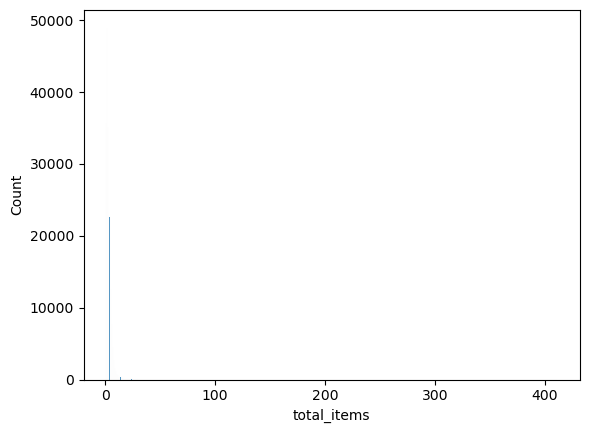

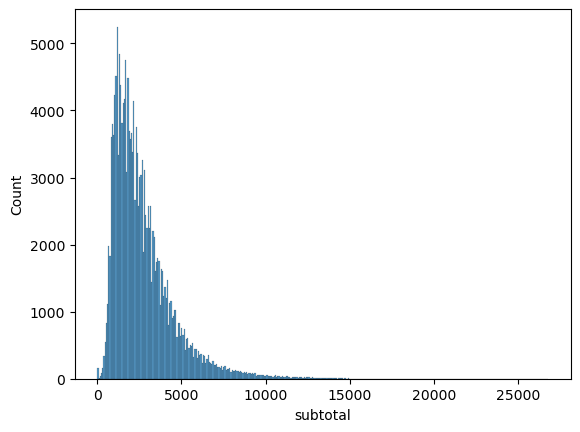

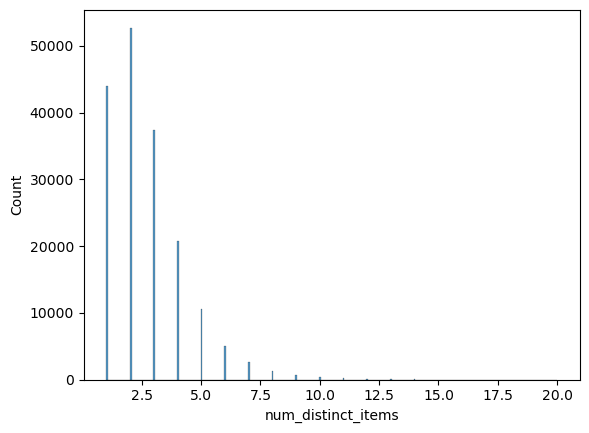

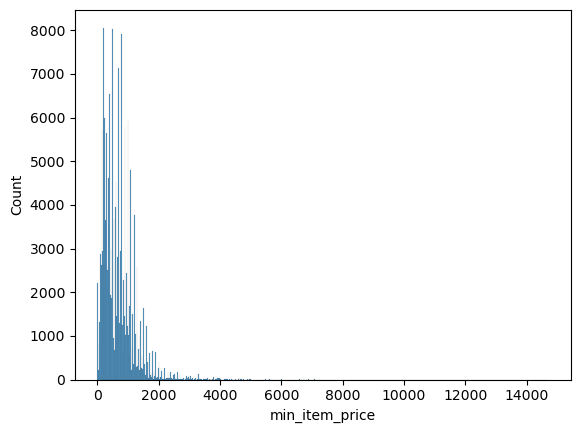

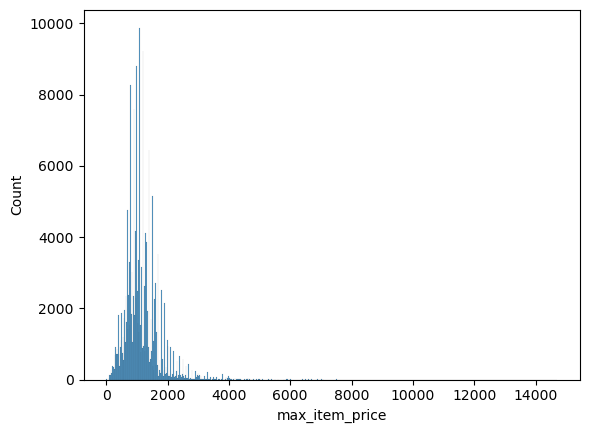

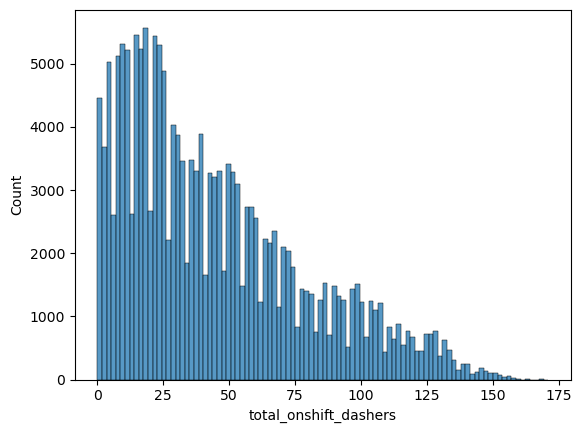

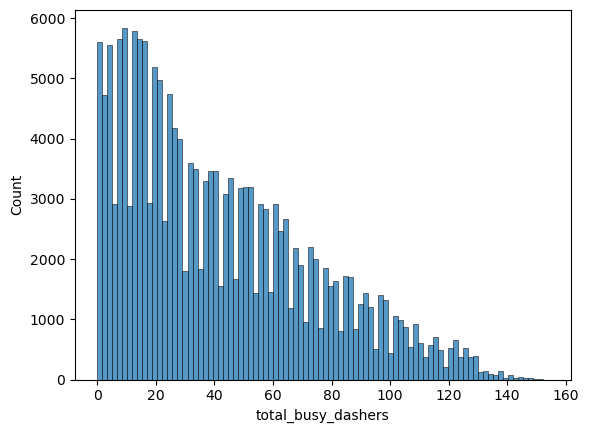

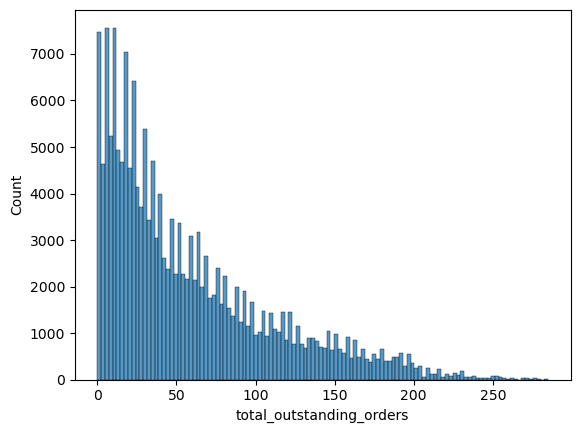

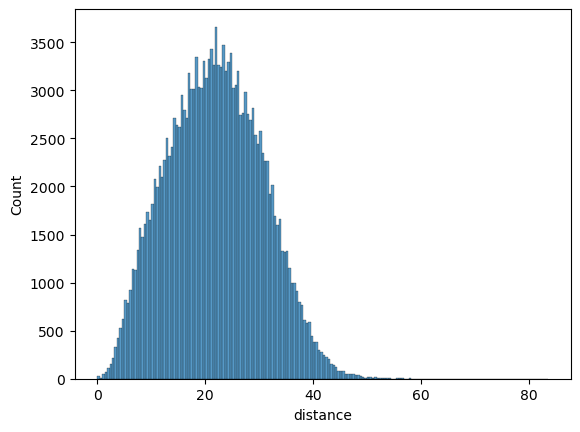

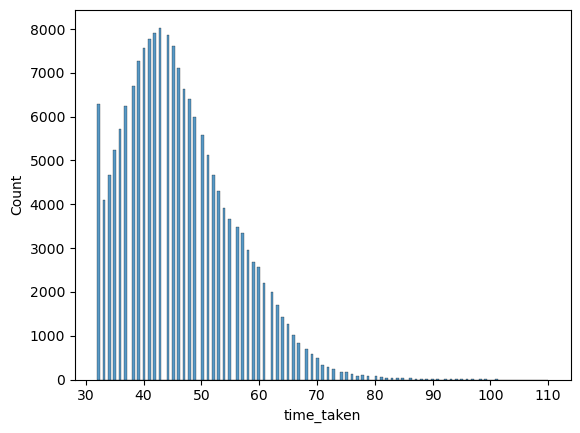

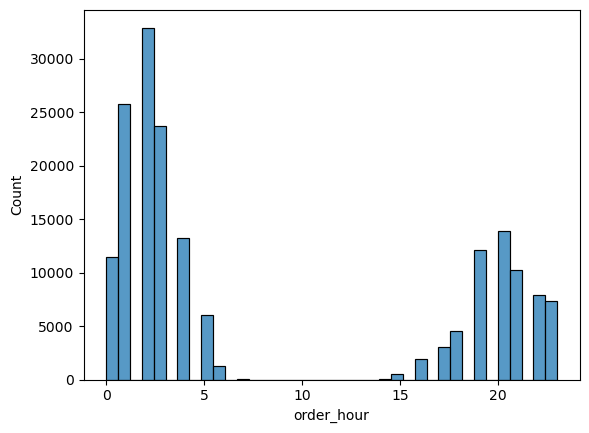

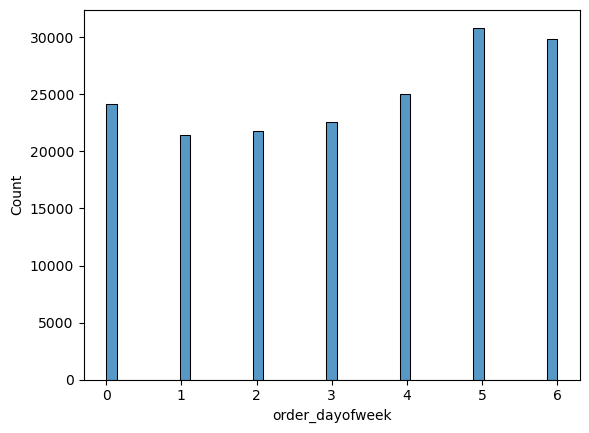

In [234]:
# Plot distributions for all numerical columns
#Univariate analysis
for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

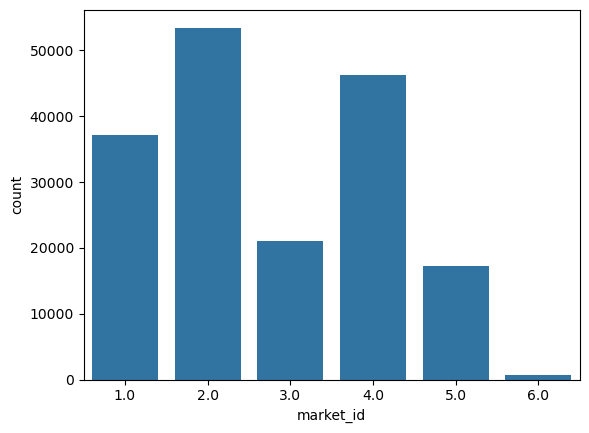

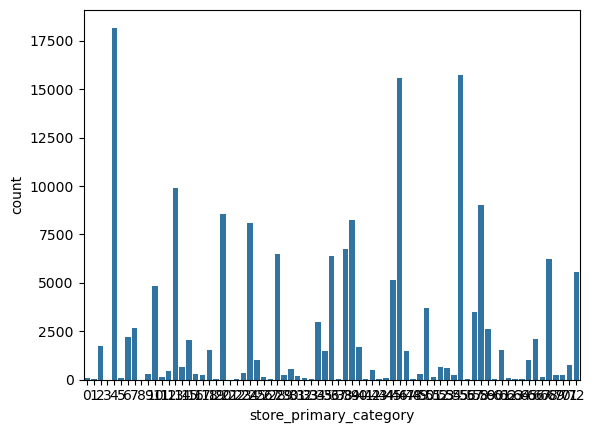

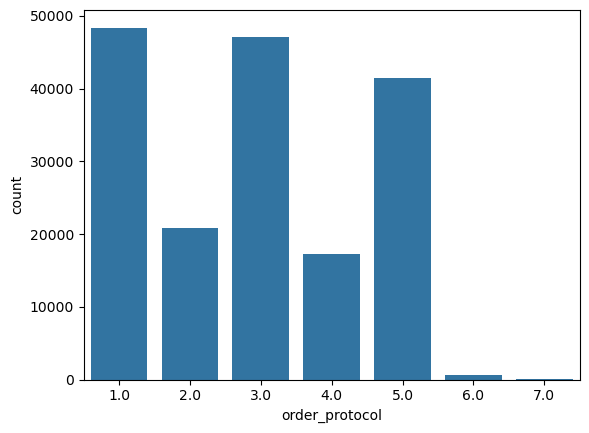

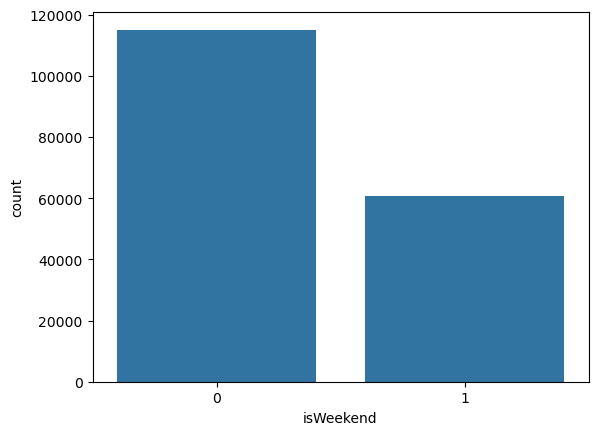

In [237]:
# Distribution of categorical columns
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

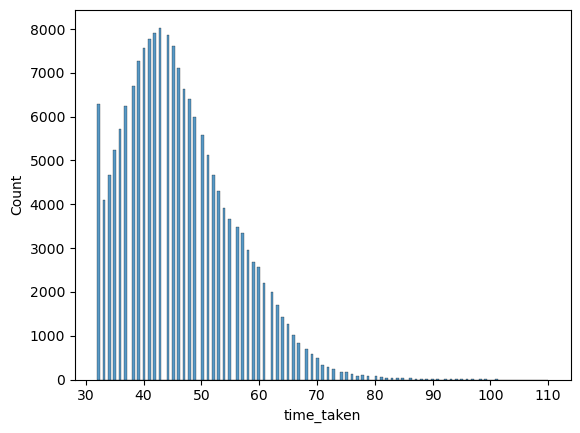

In [240]:
# Distribution of time_taken
for i in num_cols:
    if i is "time_taken":
        sns.histplot(x=df[i])
        plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

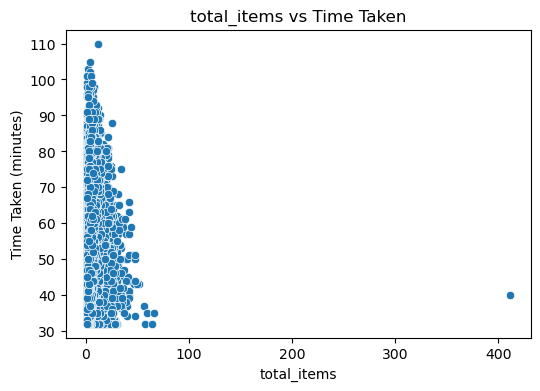

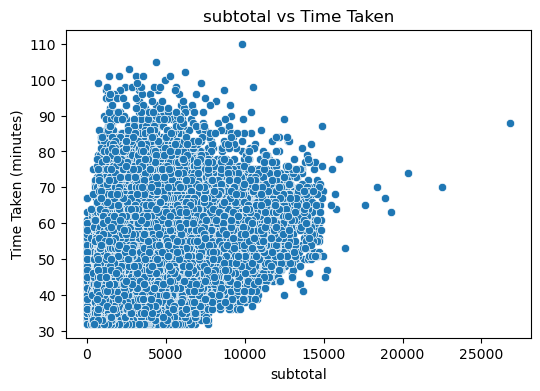

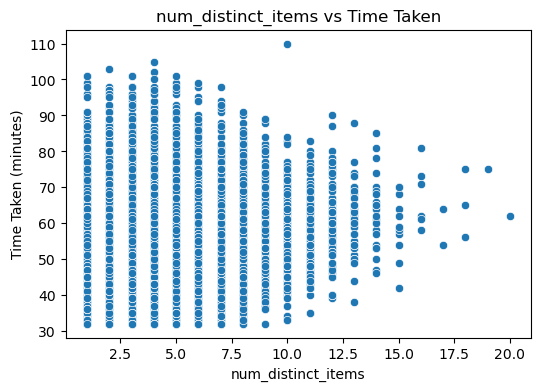

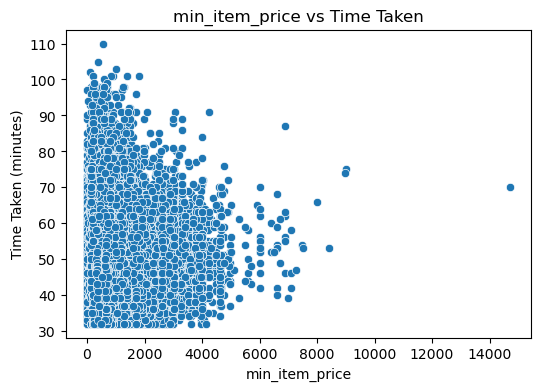

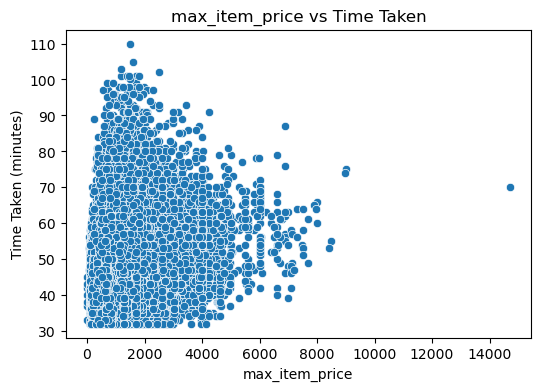

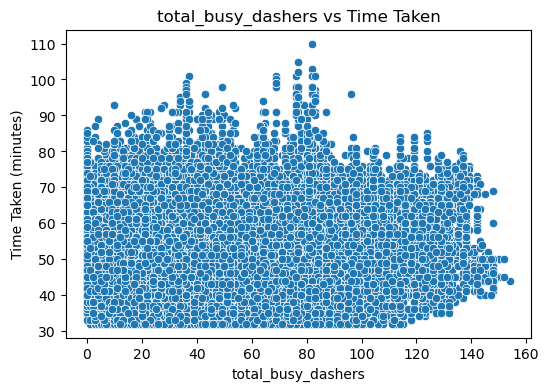

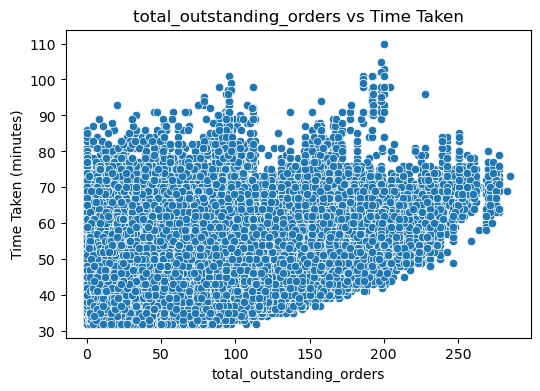

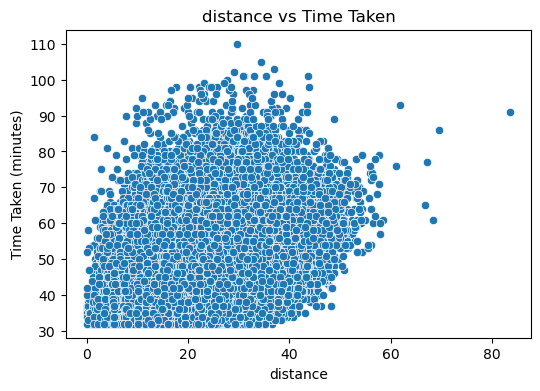

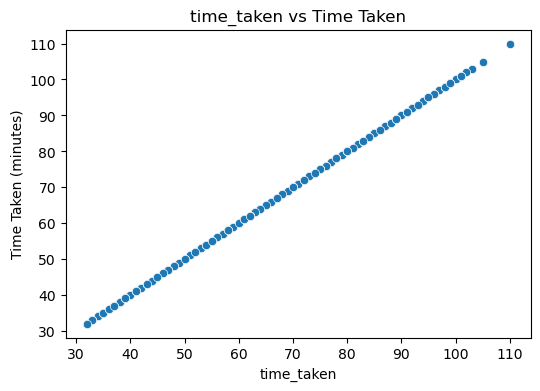

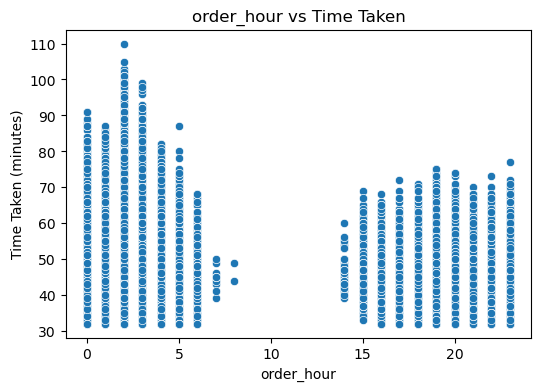

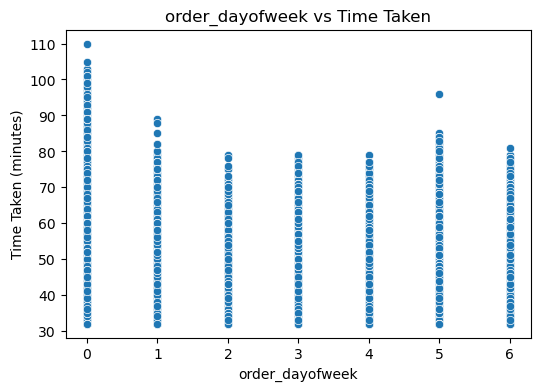

In [244]:
# Scatter plot to visualise the relationship between time_taken and other features
#bivariate analysis
for col in num_cols :
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['time_taken'])
    plt.title(f'{col} vs Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.show()


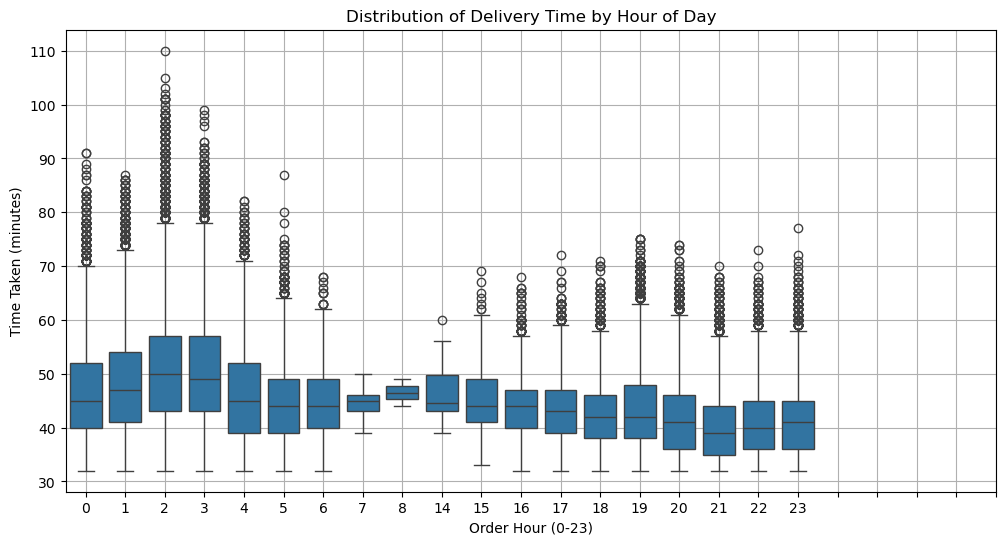

In [246]:
# Show the distribution of time_taken for different hours
df['order_hour'] = df['order_hour'].astype(int)

plt.figure(figsize=(12, 6))
sns.boxplot(x='order_hour', y='time_taken', data=df)
plt.title('Distribution of Delivery Time by Hour of Day')
plt.xlabel('Order Hour (0-23)')
plt.ylabel('Time Taken (minutes)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

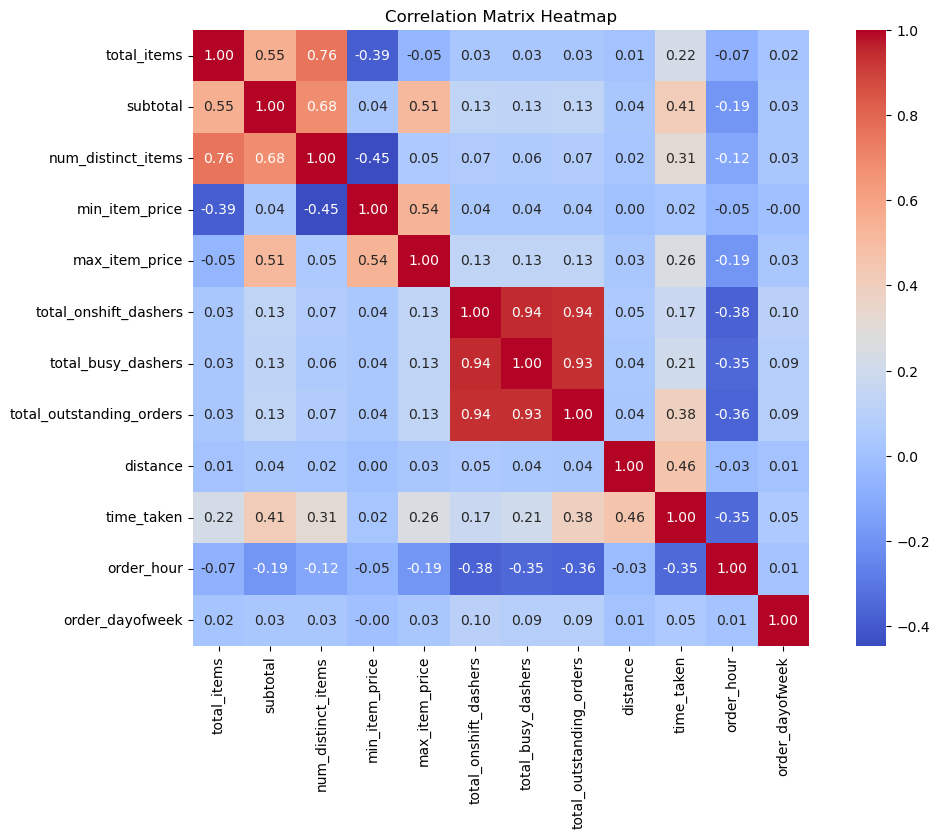

Correlation with time_taken:
 order_hour                 -0.346366
min_item_price              0.022752
order_dayofweek             0.045878
total_onshift_dashers       0.171022
total_busy_dashers          0.206050
total_items                 0.224856
max_item_price              0.255167
num_distinct_items          0.312055
total_outstanding_orders    0.385000
subtotal                    0.413267
distance                    0.460173
Name: time_taken, dtype: float64


In [250]:
# Plot the heatmap of the correlation matrix
corr_matrix = df3[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()
target_corr = corr_matrix['time_taken'].drop('time_taken')
print("Correlation with time_taken:\n", target_corr.sort_values())

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [253]:
# Drop 3-5 weakly correlated columns from training dataset
weak_features = target_corr[abs(target_corr) < 0.05].index.tolist()
print("Dropping these weak features:", weak_features)

X = X.drop(columns=weak_features)


Dropping these weak features: ['min_item_price', 'order_dayofweek']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

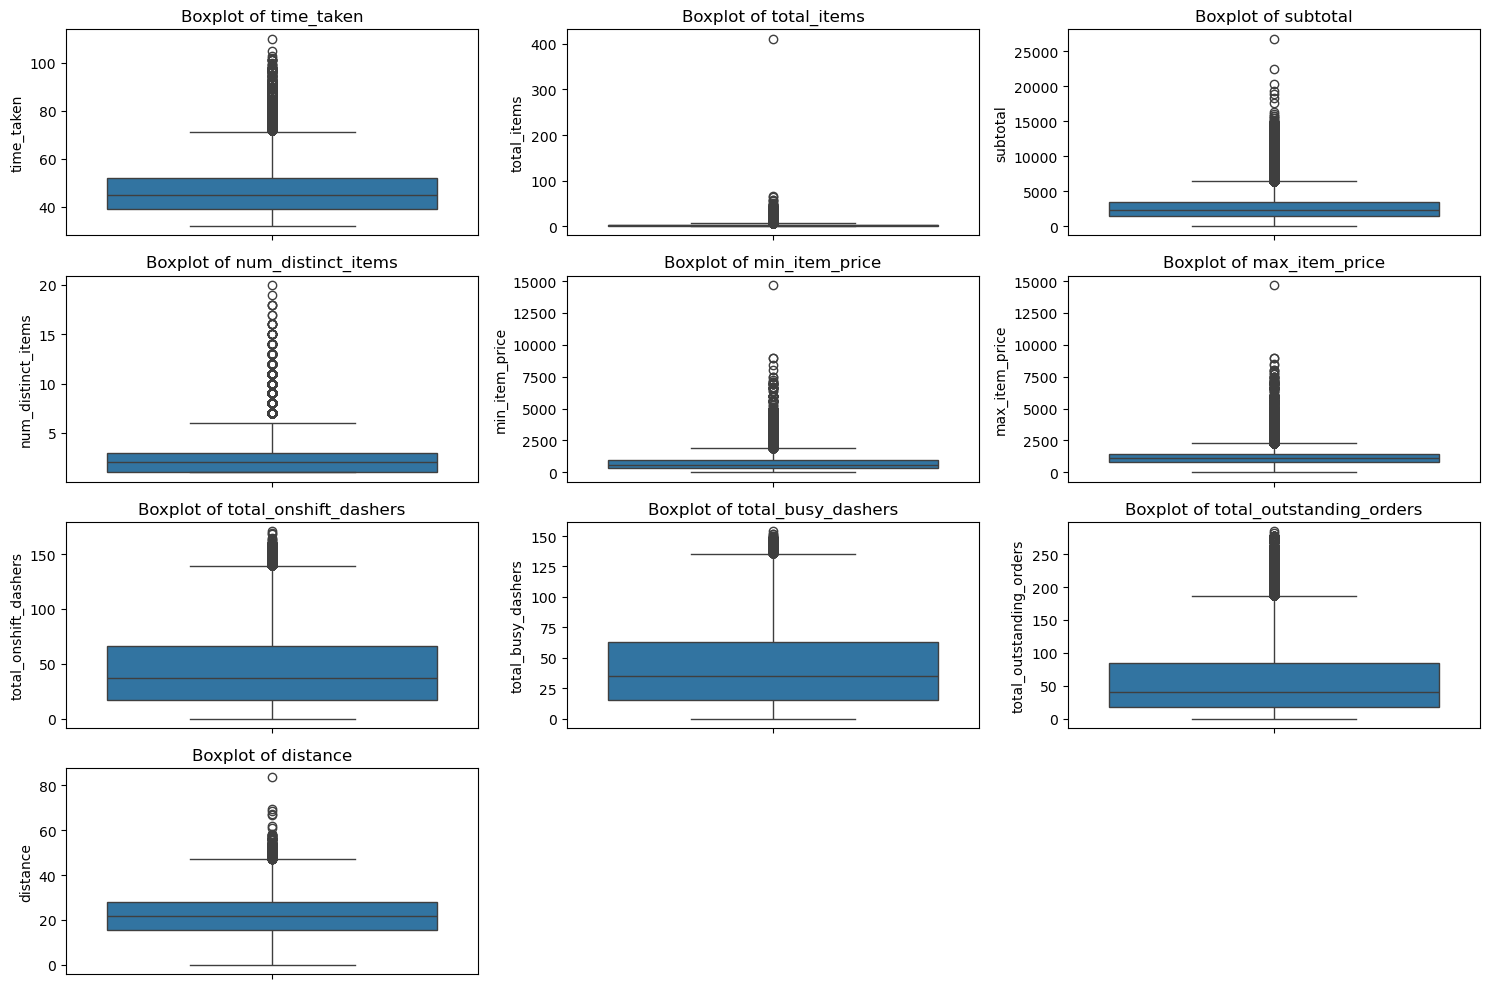

In [257]:
# Boxplot for time_taken
numericCols = ['time_taken', 'total_items', 'subtotal', 'num_distinct_items',
                'min_item_price', 'max_item_price', 'total_onshift_dashers',
                'total_busy_dashers', 'total_outstanding_orders', 'distance']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numericCols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df3[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [259]:
# Handle outliers
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers_iqr(df3, numericCols)

y = df_clean['time_taken']
X = df_clean.drop(['time_taken'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


(115745, 24) (28937, 24)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [263]:
# Import libraries

from sklearn.preprocessing import StandardScaler

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [268]:
# Apply scaling to the numerical columns
numeric_cols = ['total_items', 'subtotal', 'num_distinct_items',
                'min_item_price', 'max_item_price', 'total_onshift_dashers',
                'total_busy_dashers', 'total_outstanding_orders', 'distance']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [270]:
X_train_df = pd.DataFrame(X_train_scaled,columns=X.columns)
X_test_df = pd.DataFrame(X_test_scaled,columns=X.columns)
X_train_df.head()

store_primary_category  total_items  subtotal  num_distinct_items  \
113779                     39    -1.183857 -0.303920           -1.145990   
1740                        7    -0.498019  0.955372           -0.327628   
16335                      46     0.187818  0.721085            0.490735   
32871                      36    -0.498019 -0.299737           -1.145990   
129468                     58    -0.498019 -0.907209           -0.327628   

        min_item_price  max_item_price  total_onshift_dashers  \
113779        3.064709        2.243416               1.524358   
1740          2.151182        2.190074              -0.574174   
16335         0.180927        0.952540              -0.107834   
32871         0.731512       -0.276992              -1.107134   
129468       -1.181957       -0.146305              -0.207764   

        total_busy_dashers  total_outstanding_orders  distance  ...  \
113779            1.461788                  2.470561  1.645869  ...   
1740             -0.482803                 -0.561687  1.114698  ...   
16335             0.082897                 -0.095188 -2.224751  ...   
32871            -1.083858                 -0.981537 -0.349486  ...   
129468           -0.199953                 -0.305112  0.167828  ...   

        market_id_3.0  market_id_4.0 market_id_5.0  market_id_6.0  \
113779              0              1             0              0   
1740                0              0             0              0   
16335               0              0             0              0   
32871               1              0             0              0   
129468              0              0             0              0   

        order_protocol_2.0  order_protocol_3.0  order_protocol_4.0  \
113779                   1                   0                   0   
1740                     0                   1                   0   
16335                    0                   0                   0   
32871                    0                   0                   0   
129468                   0                   1                   0   

        order_protocol_5.0  order_protocol_6.0  order_protocol_7.0  
113779                   0                   0                   0  
1740                     0                   0                   0  
16335                    0                   0                   0  
32871                    1                   0                   0  
129468                   0                   0                   0  

[5 rows x 24 columns]

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [274]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
myModel = LinearRegression()

In [276]:
    # Train the model using the training data
rfe = RFE(estimator=myModel, n_features_to_select=8)
rfe.fit(X_train_df, y_train)

selected_features = X_train_df.columns[rfe.support_]
print("Selected Features:\n", selected_features)

myModel.fit(X_train_df[selected_features], y_train)

Selected Features:
 Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2.0',
       'market_id_3.0', 'market_id_4.0', 'market_id_5.0'],
      dtype='object')


LinearRegression()

In [296]:
selected_features1 = [
    'total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
    'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
    'distance', 'order_hour', 'isWeekend', 'market_id_2.0', 'market_id_3.0',
    'market_id_4.0', 'market_id_5.0', 'market_id_6.0', 'order_protocol_2.0',
    'order_protocol_3.0', 'order_protocol_4.0', 'order_protocol_5.0',
    'order_protocol_6.0', 'order_protocol_7.0'
]

X_train_selected1 = X_train_df[selected_features1]
X_test_selected1 = X_test_df[selected_features]

X_train_const1 = sm.add_constant(X_train_selected1)
X_test_const1 = sm.add_constant(X_test_selected1)

In [300]:
ols_model = sm.OLS(y_train, X_train_const1)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 5.019e+04
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        09:22:22   Log-Likelihood:            -2.7298e+05
No. Observations:              115745   AIC:                         5.460e+05
Df Residuals:                  115723   BIC:                         5.462e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [308]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = sm.add_constant(X_train_df[selected_features1])
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                     feature        VIF
5      total_onshift_dashers  11.389989
6         total_busy_dashers  10.274923
7   total_outstanding_orders   9.282579
0                      const   8.442411
1                total_items   6.214554
3         num_distinct_items   4.775046
2                   subtotal   3.961312
4             max_item_price   2.381268
11             market_id_2.0   2.148884
13             market_id_4.0   2.078729
17        order_protocol_3.0   1.557080
19        order_protocol_5.0   1.521564
12             market_id_3.0   1.404675
14             market_id_5.0   1.361542
18        order_protocol_4.0   1.351136
16        order_protocol_2.0   1.316140
9                 order_hour   1.282992
10                 isWeekend   1.017171
20        order_protocol_6.0   1.017155
15             market_id_6.0   1.015032
8                   distance   1.010880
21        order_protocol_7.0   1.001078


In [310]:
reduced_features = selected_features1.copy()
reduced_features.remove('total_onshift_dashers')


X_vif_reduced = sm.add_constant(X_train_df[reduced_features])
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_reduced.values, i) for i in range(X_vif_reduced.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                     feature       VIF
0                      const  8.429668
5         total_busy_dashers  7.420448
6   total_outstanding_orders  7.163826
1                total_items  6.214554
3         num_distinct_items  4.775022
2                   subtotal  3.961258
4             max_item_price  2.381185
10             market_id_2.0  2.105206
12             market_id_4.0  2.057491
16        order_protocol_3.0  1.556960
18        order_protocol_5.0  1.520635
11             market_id_3.0  1.402951
13             market_id_5.0  1.353016
17        order_protocol_4.0  1.351068
15        order_protocol_2.0  1.316140
8                 order_hour  1.263964
19        order_protocol_6.0  1.017151
14             market_id_6.0  1.014857
9                  isWeekend  1.014105
7                   distance  1.010756
20        order_protocol_7.0  1.001077


In [312]:
reduced_features1 = reduced_features.copy()
reduced_features1.remove('total_busy_dashers')


X_vif_reduced1 = sm.add_constant(X_train_df[reduced_features1])
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X_vif_reduced1.columns
vif_data1["VIF"] = [variance_inflation_factor(X_vif_reduced1.values, i) for i in range(X_vif_reduced1.shape[1])]

print(vif_data1.sort_values(by="VIF", ascending=False))

                     feature       VIF
0                      const  8.353454
1                total_items  6.214545
3         num_distinct_items  4.774837
2                   subtotal  3.961177
4             max_item_price  2.380919
9              market_id_2.0  2.038704
11             market_id_4.0  2.018197
5   total_outstanding_orders  1.699628
15        order_protocol_3.0  1.556096
17        order_protocol_5.0  1.517170
10             market_id_3.0  1.402802
12             market_id_5.0  1.351676
16        order_protocol_4.0  1.350779
14        order_protocol_2.0  1.316031
7                 order_hour  1.257628
18        order_protocol_6.0  1.017151
13             market_id_6.0  1.014637
8                  isWeekend  1.011687
6                   distance  1.010596
19        order_protocol_7.0  1.001070


In [316]:
y_pred = ols_results_final.predict(X_test_final)

In [318]:
# Find results for evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score : {r2:.4f}")
print(f"RMSE     : {rmse:.2f}")
print(f"MAE      : {mae:.4f}")
print(f"MSE      : {mse:.4f}")


R² Score : 0.5852
RMSE     : 5.23
MAE      : 4.0904
MSE      : 27.3163


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [419]:
# Build the final model with selected number of features
X_final = X_train_df[reduced_features1] 
y_final = y_train


lr_model = LinearRegression()

rfe = RFE(lr_model, n_features_to_select=12)
rfe.fit(X_final, y_final)

selected_rfe_features = X_final.columns[rfe.support_].tolist()
print("Selected 8 Features:", selected_rfe_features)
X_train_rfe = X_train_df[selected_rfe_features]
X_test_rfe = X_test_df[selected_rfe_features]

final_lr = LinearRegression()
final_lr.fit(X_train_rfe, y_train)


y_pred_rfe = final_lr.predict(X_test_rfe)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("R² Score :", r2_score(y_test, y_pred_rfe))
print("RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_rfe)))
print("MAE      :", mean_absolute_error(y_test, y_pred_rfe))
print("MSE      :", mean_squared_error(y_test, y_pred_rfe))

Selected 8 Features: ['subtotal', 'total_outstanding_orders', 'distance', 'isWeekend', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0', 'order_protocol_3.0', 'order_protocol_4.0', 'order_protocol_5.0']
R² Score : 0.5650339541063323
RMSE     : 5.352360273624036
MAE      : 4.217467759739458
MSE      : 28.64776049866877


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

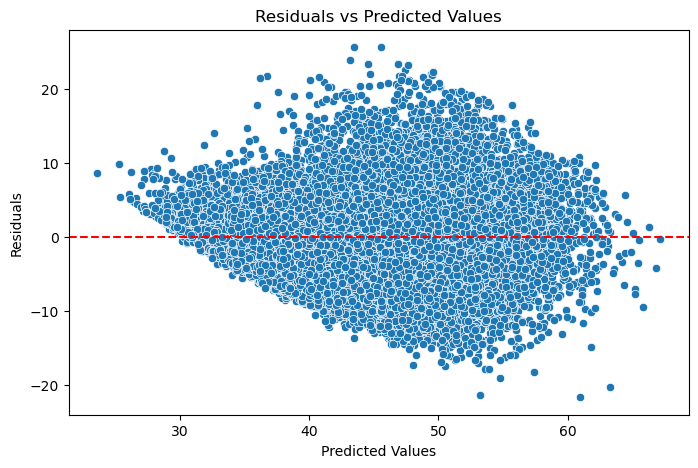

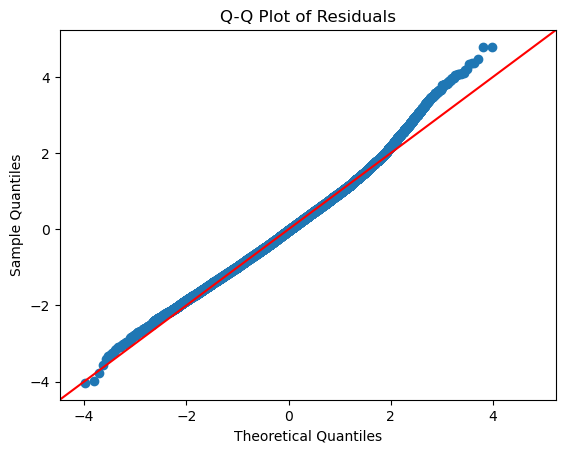

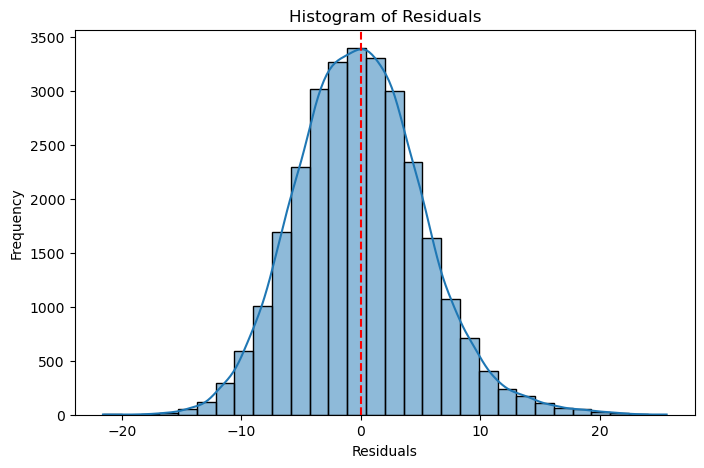

In [421]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import scipy.stats as stats
import statsmodels.api as sm

residuals = y_test - y_pred_rfe

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


[Your inferences here:]

The residuals show a triangular or funnel shape, indicating heteroscedasticity that means the variance of the errors increases with the predicted value.
Ideally we expect a random scatter around the zero line with constant spread. This pattern violates the homoscedasticity assumption of linear regression.
The residuals follow the 45-degree line fairly well, with slight deviation at the tails.
This suggests that residuals are approximately normally distributed, but with some outliers or heavier tails.
The histogram looks bell-shaped and symmetric, supporting the Q-Q plot’s conclusion.
This further confirms that the residuals are approximately normally distributed.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [339]:
# Make sure to use the same features used in the model
X_train_numeric = X_train_rfe.apply(pd.to_numeric)

# Compute standard deviations for selected RFE features
feature_stds = X_train_numeric.std()

# Get scaled coefficients from final_lr
scaled_coefs = pd.Series(final_lr.coef_, index=selected_rfe_features)

# Compute unscaled coefficients
unscaled_coefs = scaled_coefs / feature_stds

# Build analysis table
coef_analysis = pd.DataFrame({
    'Feature': selected_rfe_features,
    'Scaled Coefficient': scaled_coefs.values,
    'Feature Std Dev (σ)': feature_stds.values,
    'Unscaled Coefficient (β/σ)': unscaled_coefs.values,
    'Impact per Unit Increase in Feature (minutes)': unscaled_coefs.values
})

# Sort by impact
coef_analysis = coef_analysis.sort_values(by='Impact per Unit Increase in Feature (minutes)', ascending=False)

print(coef_analysis.round(4))


                     Feature  Scaled Coefficient  Feature Std Dev (σ)  \
2                   distance              4.1303               1.0000   
1   total_outstanding_orders              3.2907               1.0000   
3                  isWeekend              1.3222               0.4678   
0                   subtotal              2.1039               1.0000   
9         order_protocol_3.0             -1.4758               0.4398   
10        order_protocol_4.0             -1.6867               0.2982   
11        order_protocol_5.0             -3.2167               0.4248   
7              market_id_5.0             -3.7757               0.3079   
5              market_id_3.0             -4.1894               0.3337   
6              market_id_4.0             -6.7694               0.4340   
4              market_id_2.0             -8.5175               0.4552   
8              market_id_6.0             -4.2781               0.0599   

    Unscaled Coefficient (β/σ)  Impact per Unit In

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [343]:
# Analyze the effect of a unit change in a feature, say 'total_items'

for feature, scaled_coef, std_dev, unscaled_coef in zip(
    coef_analysis['Feature'], 
    coef_analysis['Scaled Coefficient'], 
    coef_analysis['Feature Std Dev (σ)'], 
    coef_analysis['Unscaled Coefficient (β/σ)']
):
    direction = "increases" if unscaled_coef > 0 else "decreases"
    impact = abs(unscaled_coef)
    
    print(f"- Feature: '{feature}'")
    print(f" Scaled Coefficient (per 1σ change): {scaled_coef:.4f}")
    print(f"Standard Deviation (σ): {std_dev:.4f}")
    print(f"Unscaled Coefficient (per unit change): {unscaled_coef:.4f}")
    print(f"Interpretation: For every +1 unit change in '{feature}', "
          f"delivery time {direction} by approximately {impact:.2f} minutes.\n")

- Feature: 'distance'
 Scaled Coefficient (per 1σ change): 4.1303
Standard Deviation (σ): 1.0000
Unscaled Coefficient (per unit change): 4.1303
Interpretation: For every +1 unit change in 'distance', delivery time increases by approximately 4.13 minutes.

- Feature: 'total_outstanding_orders'
 Scaled Coefficient (per 1σ change): 3.2907
Standard Deviation (σ): 1.0000
Unscaled Coefficient (per unit change): 3.2906
Interpretation: For every +1 unit change in 'total_outstanding_orders', delivery time increases by approximately 3.29 minutes.

- Feature: 'isWeekend'
 Scaled Coefficient (per 1σ change): 1.3222
Standard Deviation (σ): 0.4678
Unscaled Coefficient (per unit change): 2.8263
Interpretation: For every +1 unit change in 'isWeekend', delivery time increases by approximately 2.83 minutes.

- Feature: 'subtotal'
 Scaled Coefficient (per 1σ change): 2.1039
Standard Deviation (σ): 1.0000
Unscaled Coefficient (per unit change): 2.1039
Interpretation: For every +1 unit change in 'subtotal'

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**


yes, i have categorical variables  like isWeekend, order_protocol, market_id from the analysis following can be interpreted:
 The order is placed on a weekend (vs. weekday), delivery time increases by ~2.8 minutes likely due to more demand, traffic, or fewer dashers
 Orders using protocols 3, 4, or 5 reduce delivery time significantly compared to the protocol 1 or 2.

This suggests that certain protocols are more efficient — they might prioritize faster workflows, optimized routing, or automated processing.
Regional/geographic differences (market_id) have the biggest impact, with some areas being far more efficient.





---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**

That means 20% of the data is used for testing

The remaining 80% is used for training. This helps in preventing overfitting where the model only performs well on the training set
and measure performance using metrics like R², RMSE, MAE on data the model hasn’t seen.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
distance (correlation ≈ 0.46)

This means that among the features shown, the delivery distance has the strongest linear relationship with delivery time



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

I used the Interquartile Range (IQR) method to detect outliers for each numerical feature, including the target variable time_taken. Outliers were defined as values below Q1 - 1.5* IQR or above Q3 + 1.5* IQR. These rows were removed from the dataset. Since outliers impact the analysis with extreme values.


---

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?


**Answer:**


market_id_6.0

market_id_2.0

market_id_4.0


---


#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**

inear regression models the relationship between input variables such as features and an output variable by fitting a linear equation to the observed data.

This involves one input feature (x) and one output (y):


$y = \beta_0 + \beta_1 x + \epsilon$

Where:
- $ y $: Predicted value (dependent variable)
- $x $: Feature (independent variable)
- $\beta_0$): Intercept (value of ( y ) when ( x = 0 ))
- $\beta_1 $: Slope (change in ( y ) for a unit change in ( x ))
- $ \epsilon $: Error term (difference between actual and predicted values)

---

##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**

Difference Between Simple Linear Regression and Multiple Linear Regression

Linear regression can be categorized into two main types based on the number of independent variables involved:



Simple Linear Regression:
Simple Linear Regression models the relationship between one independent variable (feature) and one dependent variable (target).


$y = \beta_0 + \beta_1 x + \epsilon$


Where:
- $ y $: Predicted value  
- $ x $: Independent variable  
- $\beta_0$: Intercept  
- $\beta_1$: Slope (coefficient)  
- $\epsilon $: Error term



 Multiple Linear Regression:
Multiple Linear Regression models the relationship between two or more independent variables and one dependent variable.


$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
$

Where:
- $x_1, x_2, ..., x_n $: Multiple independent variables  
- $ \beta_1, \beta_2, ..., \beta_n$: Coefficients for each feature


---

##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**


Cost Function: Mean Squared Error (MSE)

To measure how well the model is performing, we use the **cost function**:

$
J(\beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

Where:
- $y_i$ = actual value  
- $\hat{y}_i$ = predicted value  
- $n $= number of data points
  
  The cost function represents the model's prediction error.
  We minimize it to improve model accuracy.
Normal Equation solves it directly:

$
\beta = (X^T X)^{-1} X^T y
$
 Gradient Descent solves it iteratively:
$
\beta_j := \beta_j - \alpha \cdot \frac{\partial J}{\partial \beta_j}
$

---

##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.

**Answer:**

Overfitting occurs when a model learns not only the underlying patterns in the training data but also the noise and random fluctuations.

Underfitting occurs when a model is too simple to learn the underlying pattern in the data.


---

##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

A residual plot is a key diagnostic tool in linear regression. It helps determine whether the assumptions of the linear model are valid and if the model is a good fit for the data.



A residual is the difference between the actual value and the predicted value:

$
\text{Residual} = y_i - \hat{y}_i
$

Where:
- $y_i $: Actual value
- $ \hat{y}_i $: Predicted value from the model

---

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---
market_id_6.0

market_id_2.0

market_id_4.0


#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>